#### Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

##### Data Description:
- Murder -- Muder rates in different places of United States
- Assualt- Assualt rate in different places of United States
- UrbanPop - urban population in different places of United States
- Rape - Rape rate in different places of United States

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import scipy.cluster.hierarchy as sch

from sklearn import metrics
from sklearn.cluster import KMeans, DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
crime = pd.read_csv('crime_data.csv')
crime.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [3]:
crime.rename(columns = {'Unnamed: 0' : 'state'}, inplace = True)

In [4]:
crime.head()

,state,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
crime.shape

(50, 5)

In [6]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   state     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [7]:
crime[crime.duplicated(keep = False)]

,state,Murder,Assault,UrbanPop,Rape


In [8]:
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


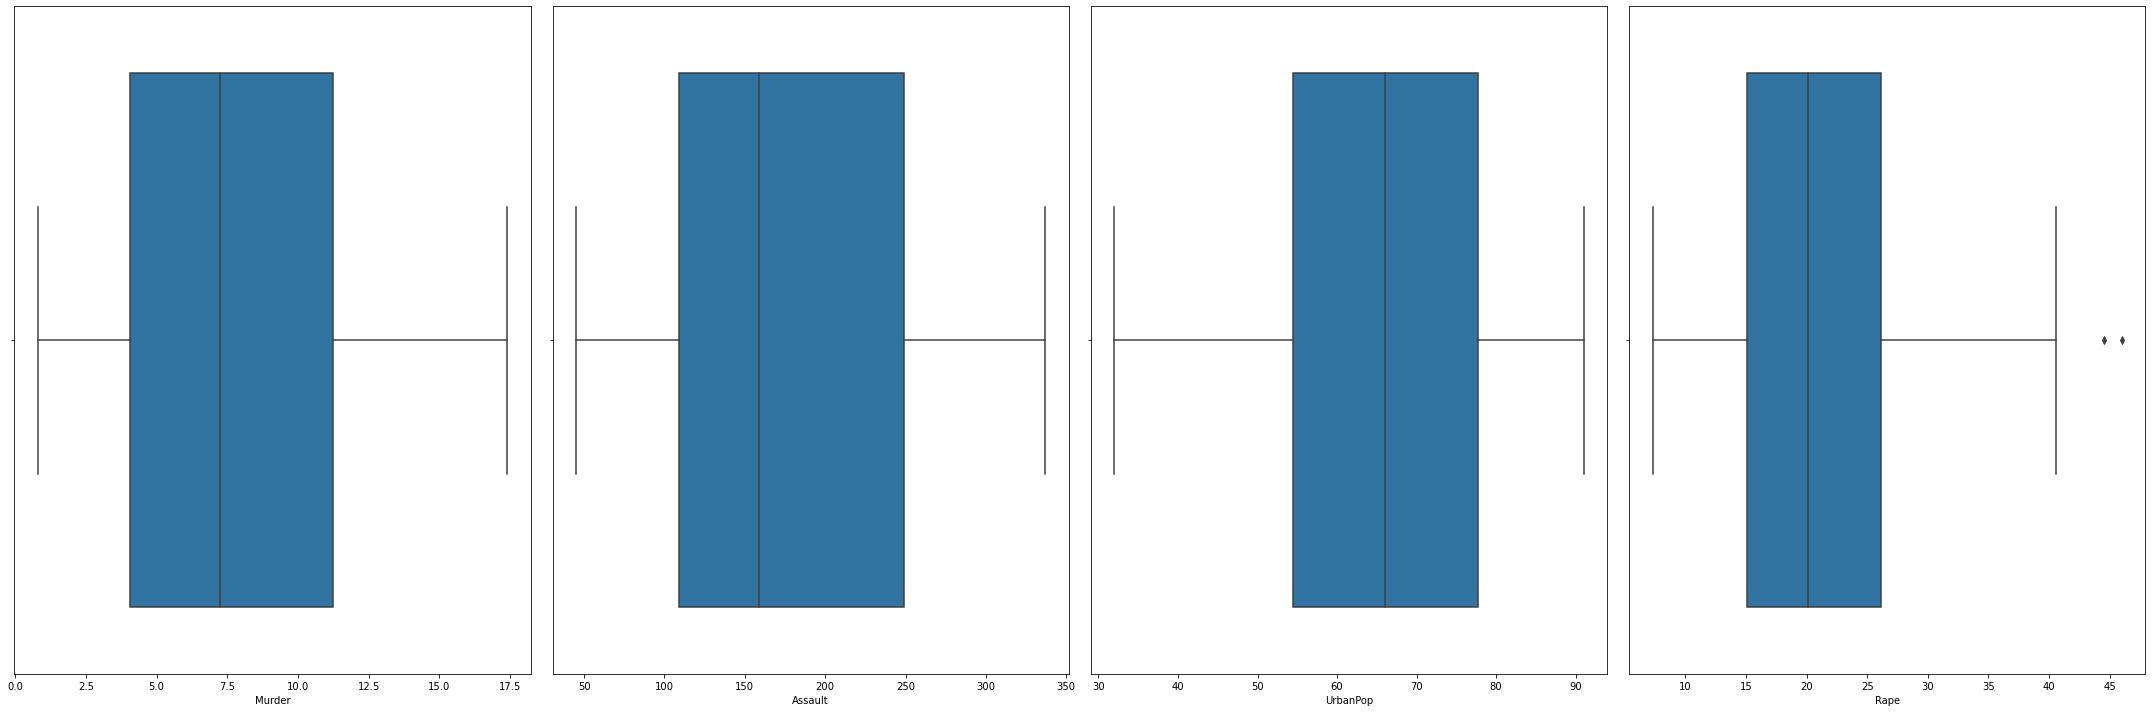

In [9]:
fig, ax = plt.subplots(1, 4, figsize=(30,10))
sns.boxplot(crime.Murder, ax=ax[0])
sns.boxplot(crime.Assault, ax=ax[1])
sns.boxplot(crime.UrbanPop, ax=ax[2])
sns.boxplot(crime.Rape, ax=ax[3])
plt.tight_layout()
plt.show()

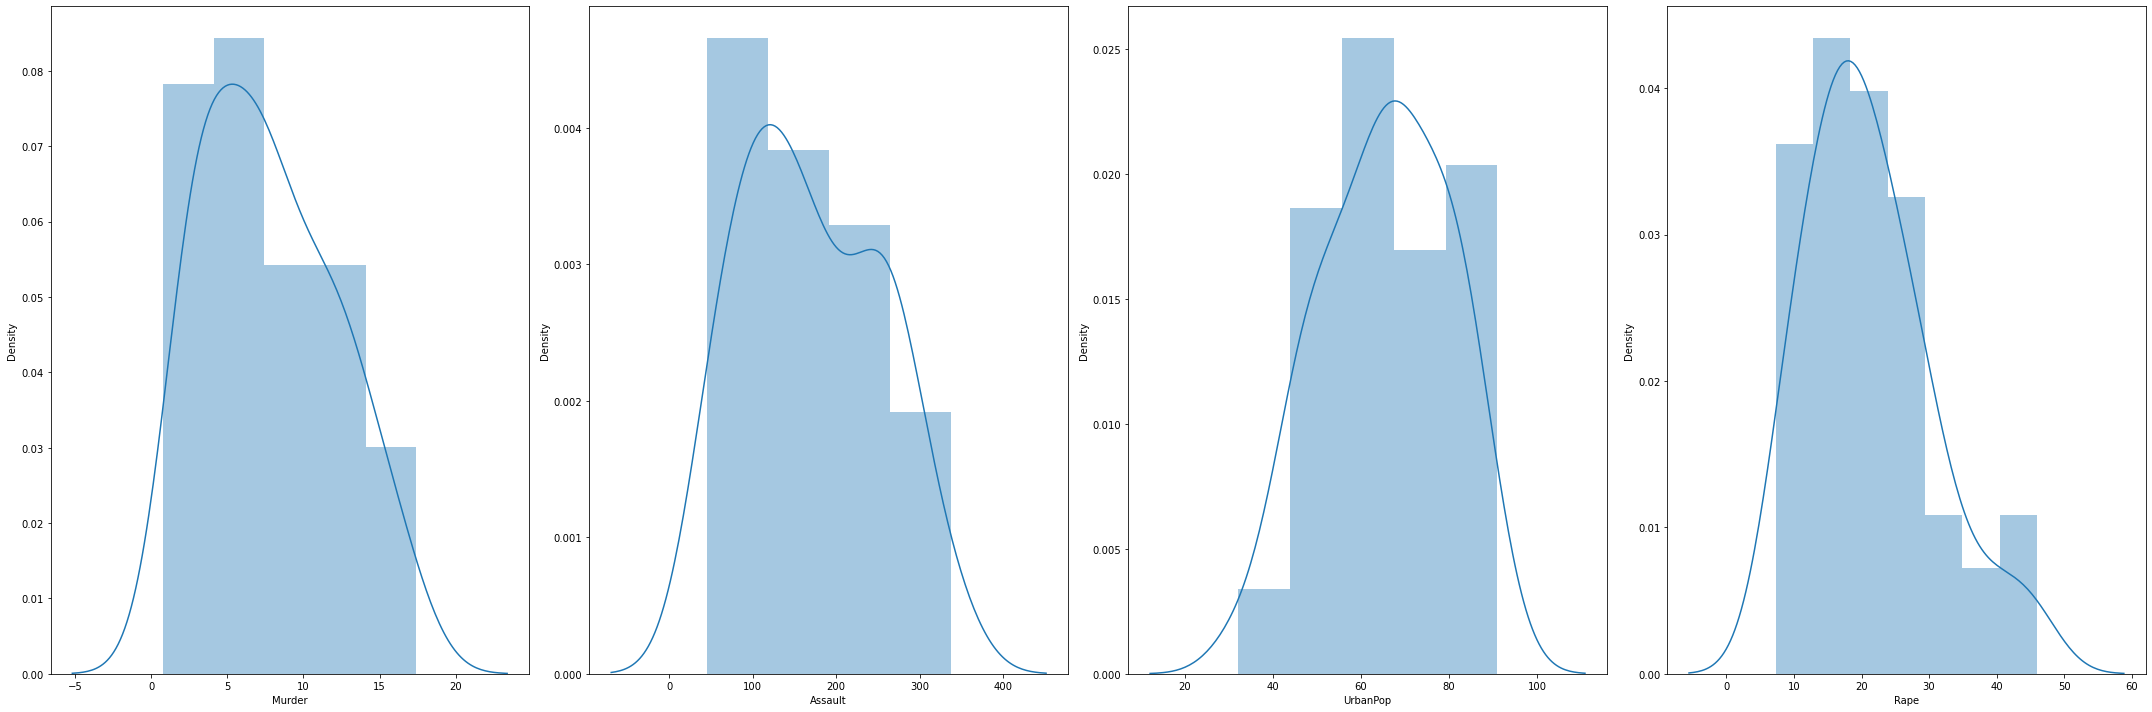

In [10]:
fig, ax = plt.subplots(1, 4, figsize=(30,10))
sns.distplot(crime.Murder, ax=ax[0])
sns.distplot(crime.Assault, ax=ax[1])
sns.distplot(crime.UrbanPop, ax=ax[2])
sns.distplot(crime.Rape, ax=ax[3])
plt.tight_layout()
plt.show()

##### K-Means

In [11]:
#Similar to the sklearn.preprocessing, MinMaxScaler function
def norm_fun(i):
    x = (i-i.min())/(i.max()-i.min())
    return(x)

In [12]:
#Similar to the sklearn.preprocessing, StandardScaler function
def norm_func(i):
    x = (i-i.mean())/(i.std())
    return(x)

In [13]:
x = norm_func(crime.iloc[:,1:])
x

,Murder,Assault,UrbanPop,Rape
0,1.242564,0.782839,-0.520907,-0.003416
1,0.507862,1.106823,-1.211764,2.484203
2,0.071633,1.478803,0.998980,1.042878
3,0.232349,0.230868,-1.073593,-0.184917
4,0.278268,1.262814,1.758923,2.067820
5,0.025715,0.398859,0.860809,1.864967
6,-1.030419,-0.729082,0.791723,-1.081741
7,-0.433474,0.806838,0.446294,-0.579946
8,1.747671,1.970778,0.998980,1.138967
9,2.206860,0.482855,-0.382735,0.487702


In [14]:
#Normalization Function
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_crime_df = scaler.fit_transform(crime.iloc[:, 1:])

In [15]:
scaled_crime_df

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [16]:
# How to find optimum number of clusters
# The K-Means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

[196.00000000000003, 102.86240049441734, 78.4870840955563, 56.40317345829284, 49.50986021484367, 43.04891476407623, 39.71139791909337, 33.99364062989211, 32.052351736604216, 27.745406609180108]


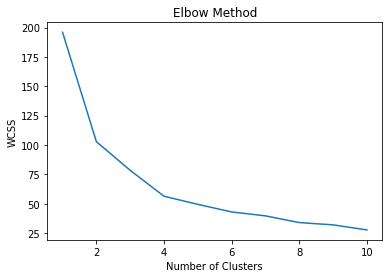

In [17]:
#WCSS (Within Cluster Sum of Squares)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

print(wcss)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [18]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(5, random_state = 0)
clusters_new.fit(x)

KMeans(n_clusters=5, random_state=0)

In [19]:
clusters_new.labels_

array([0, 4, 4, 3, 4, 4, 2, 3, 4, 0, 2, 1, 4, 3, 1, 3, 3, 0, 1, 4, 2, 4,
       3, 0, 4, 3, 3, 4, 1, 2, 4, 4, 0, 1, 3, 3, 3, 3, 2, 0, 1, 0, 4, 2,
       1, 3, 3, 1, 1, 3])

In [20]:
#Assign clusters to the dataset
crime['clusterid_k'] = clusters_new.labels_

In [21]:
crime

,state,Murder,Assault,UrbanPop,Rape,clusterid_k
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,4
2,Arizona,8.1,294,80,31.0,4
3,Arkansas,8.8,190,50,19.5,3
4,California,9.0,276,91,40.6,4
5,Colorado,7.9,204,78,38.7,4
6,Connecticut,3.3,110,77,11.1,2
7,Delaware,5.9,238,72,15.8,3
8,Florida,15.4,335,80,31.9,4
9,Georgia,17.4,211,60,25.8,0


In [22]:
#These are Standardized values.
clusters_new.cluster_centers_

array([[ 1.58039562,  0.96625839, -0.77751086,  0.04844071],
       [-1.17327764, -1.21039048, -1.11964985, -1.14935846],
       [-0.7549059 , -0.53309232,  1.24078021, -0.53012273],
       [-0.3339831 , -0.41229859, -0.0879692 , -0.22762251],
       [ 0.6950701 ,  1.03944141,  0.72263703,  1.27693964]])

In [23]:
crime.groupby('clusterid_k').agg(['mean']).reset_index

<bound method DataFrame.reset_index of                 Murder     Assault   UrbanPop       Rape
                  mean        mean       mean       mean
clusterid_k                                             
0            14.671429  251.285714  54.285714  21.685714
1             2.677778   69.888889  49.333333  10.466667
2             4.500000  126.333333  83.500000  16.266667
3             6.333333  136.400000  64.266667  19.100000
4            10.815385  257.384615  76.000000  33.192308>

In [24]:
crime

,state,Murder,Assault,UrbanPop,Rape,clusterid_k
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,4
2,Arizona,8.1,294,80,31.0,4
3,Arkansas,8.8,190,50,19.5,3
4,California,9.0,276,91,40.6,4
5,Colorado,7.9,204,78,38.7,4
6,Connecticut,3.3,110,77,11.1,2
7,Delaware,5.9,238,72,15.8,3
8,Florida,15.4,335,80,31.9,4
9,Georgia,17.4,211,60,25.8,0


In [25]:
crime['clusterid_k'] = crime['clusterid_k'].replace(0, 'Cluster 1')
crime['clusterid_k'] = crime['clusterid_k'].replace(1, 'Cluster 2')
crime['clusterid_k'] = crime['clusterid_k'].replace(2, 'Cluster 3')
crime['clusterid_k'] = crime['clusterid_k'].replace(3, 'Cluster 4')
crime['clusterid_k'] = crime['clusterid_k'].replace(4, 'Cluster 5')
crime

,state,Murder,Assault,UrbanPop,Rape,clusterid_k
0,Alabama,13.2,236,58,21.2,Cluster 1
1,Alaska,10.0,263,48,44.5,Cluster 5
2,Arizona,8.1,294,80,31.0,Cluster 5
3,Arkansas,8.8,190,50,19.5,Cluster 4
4,California,9.0,276,91,40.6,Cluster 5
5,Colorado,7.9,204,78,38.7,Cluster 5
6,Connecticut,3.3,110,77,11.1,Cluster 3
7,Delaware,5.9,238,72,15.8,Cluster 4
8,Florida,15.4,335,80,31.9,Cluster 5
9,Georgia,17.4,211,60,25.8,Cluster 1


In [26]:
crime.columns

Index(['state', 'Murder', 'Assault', 'UrbanPop', 'Rape', 'clusterid_k'], dtype='object')

In [27]:
crime.groupby('clusterid_k').mean()

,Murder,Assault,UrbanPop,Rape
clusterid_k,,,,
Cluster 1,14.671429,251.285714,54.285714,21.685714
Cluster 2,2.677778,69.888889,49.333333,10.466667
Cluster 3,4.500000,126.333333,83.500000,16.266667
Cluster 4,6.333333,136.400000,64.266667,19.100000
Cluster 5,10.815385,257.384615,76.000000,33.192308


In [28]:
crime['clusterid_k'].value_counts()

Cluster 4    15
Cluster 5    13
Cluster 2     9
Cluster 1     7
Cluster 3     6
Name: clusterid_k, dtype: int64

In [29]:
#Silhouette Score
X = metrics.silhouette_score(x, clusters_new.labels_)
X

0.3061280316914626

##### Hierarchical Clustering

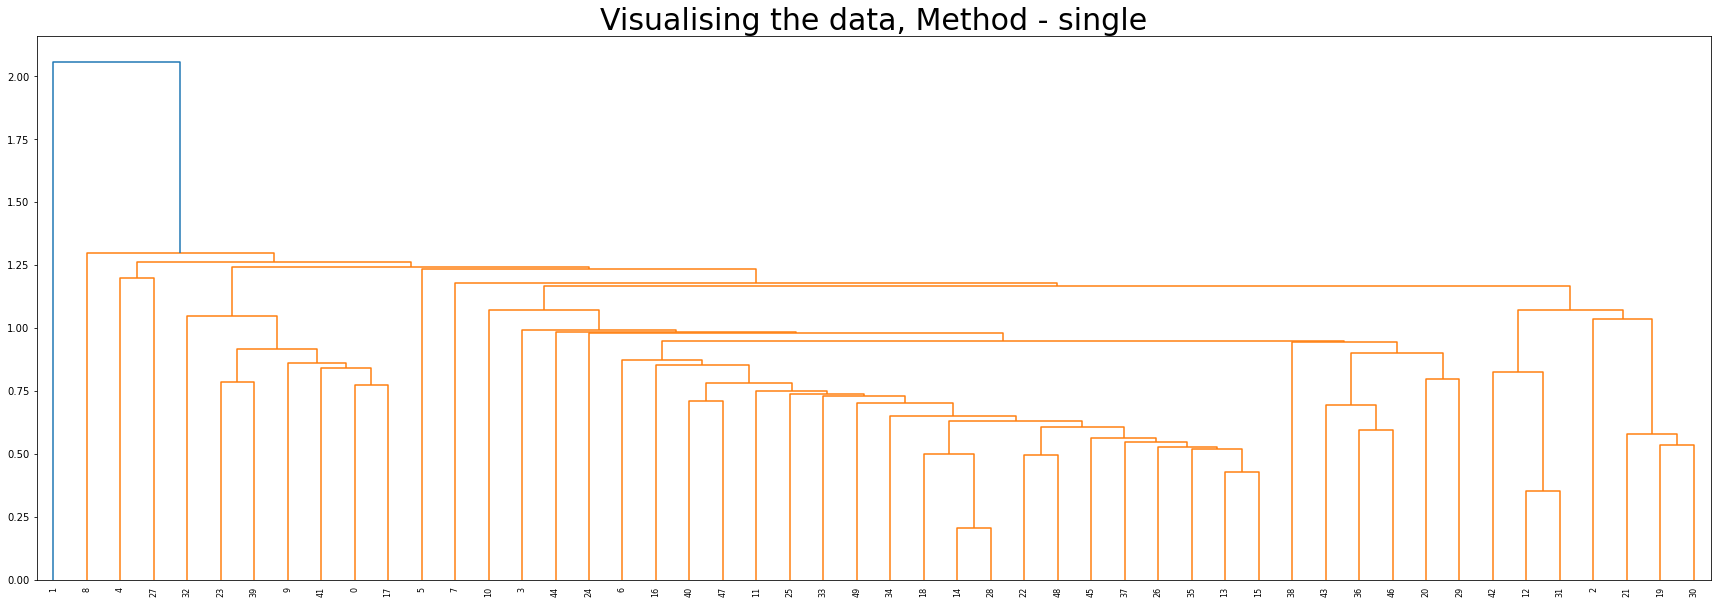

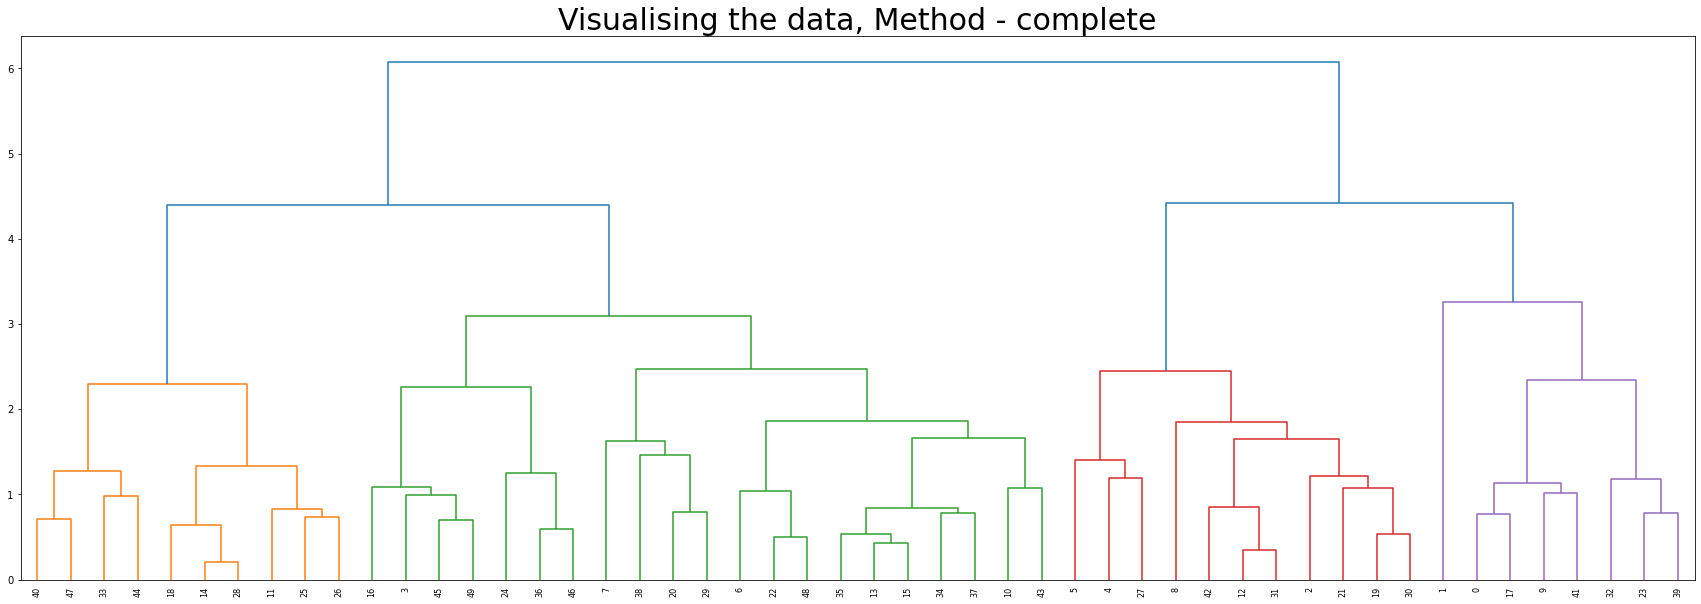

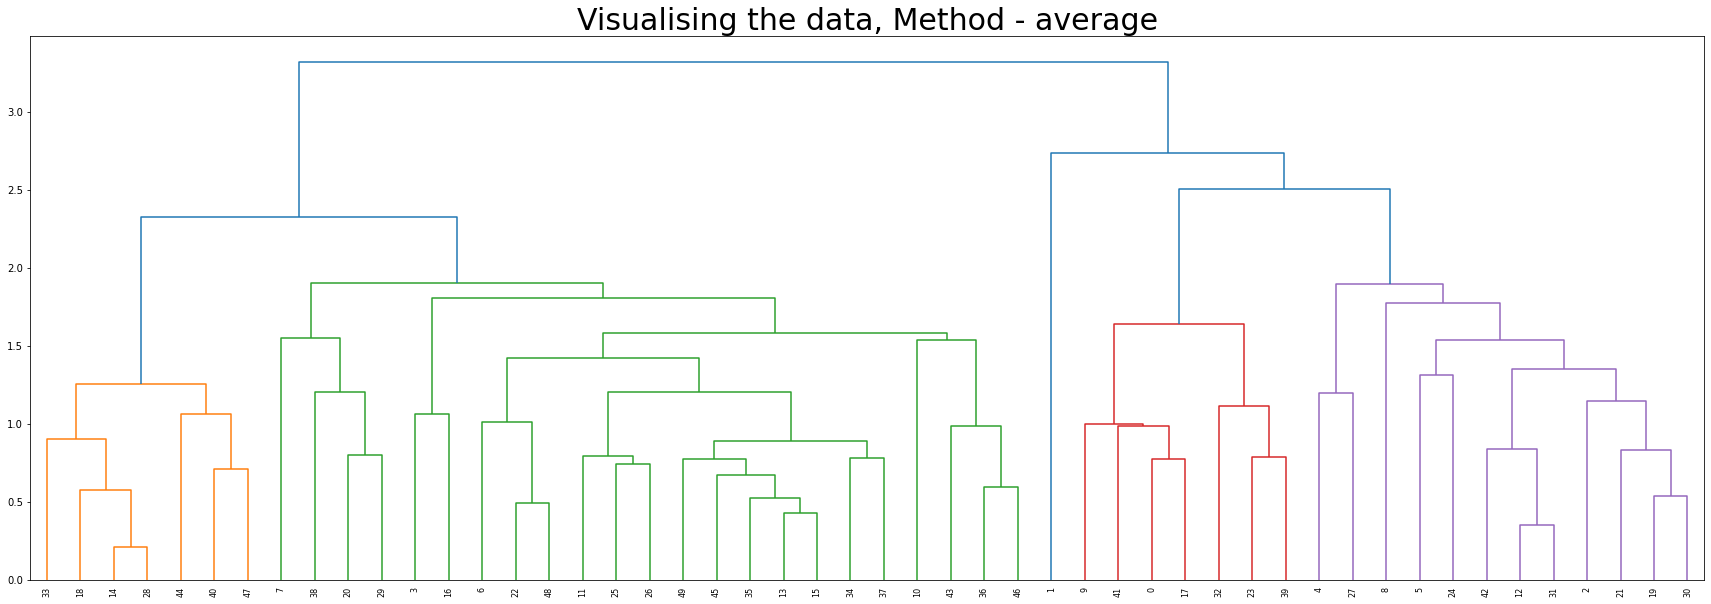

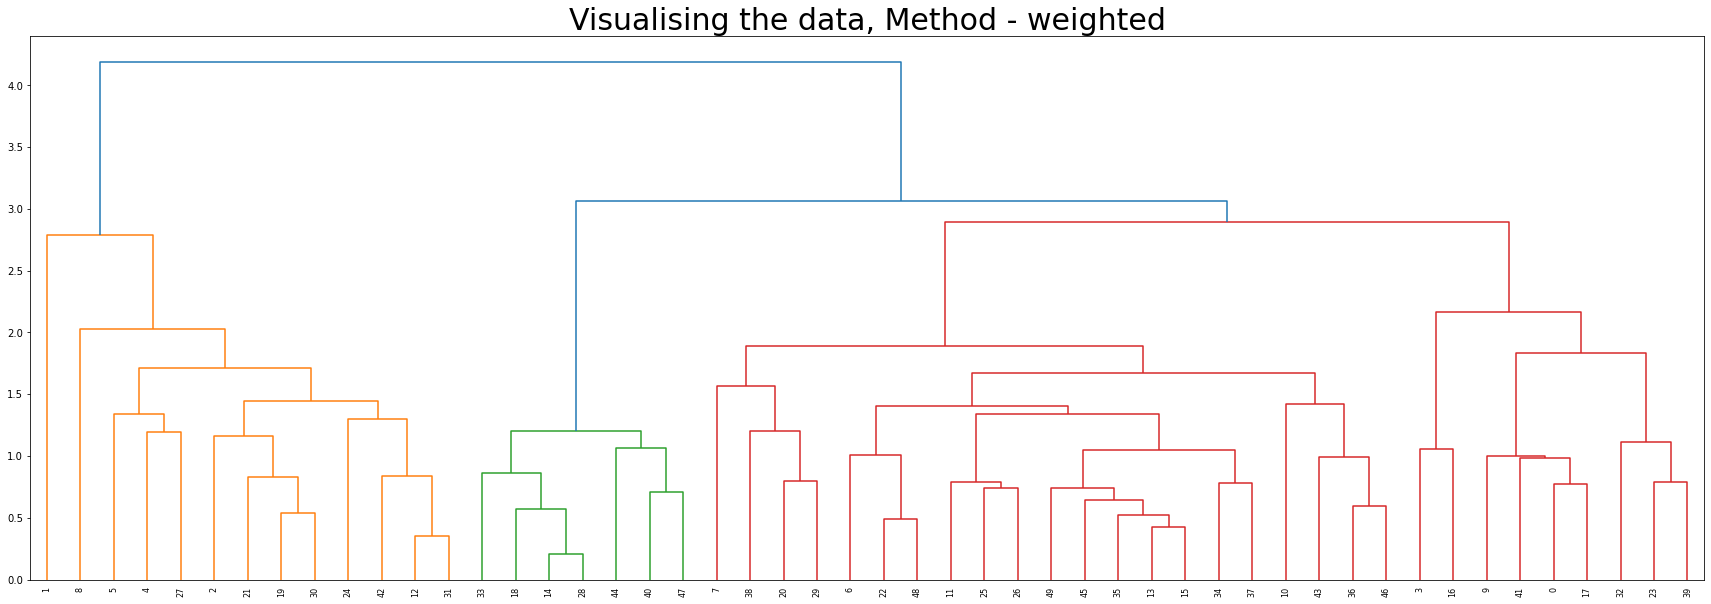

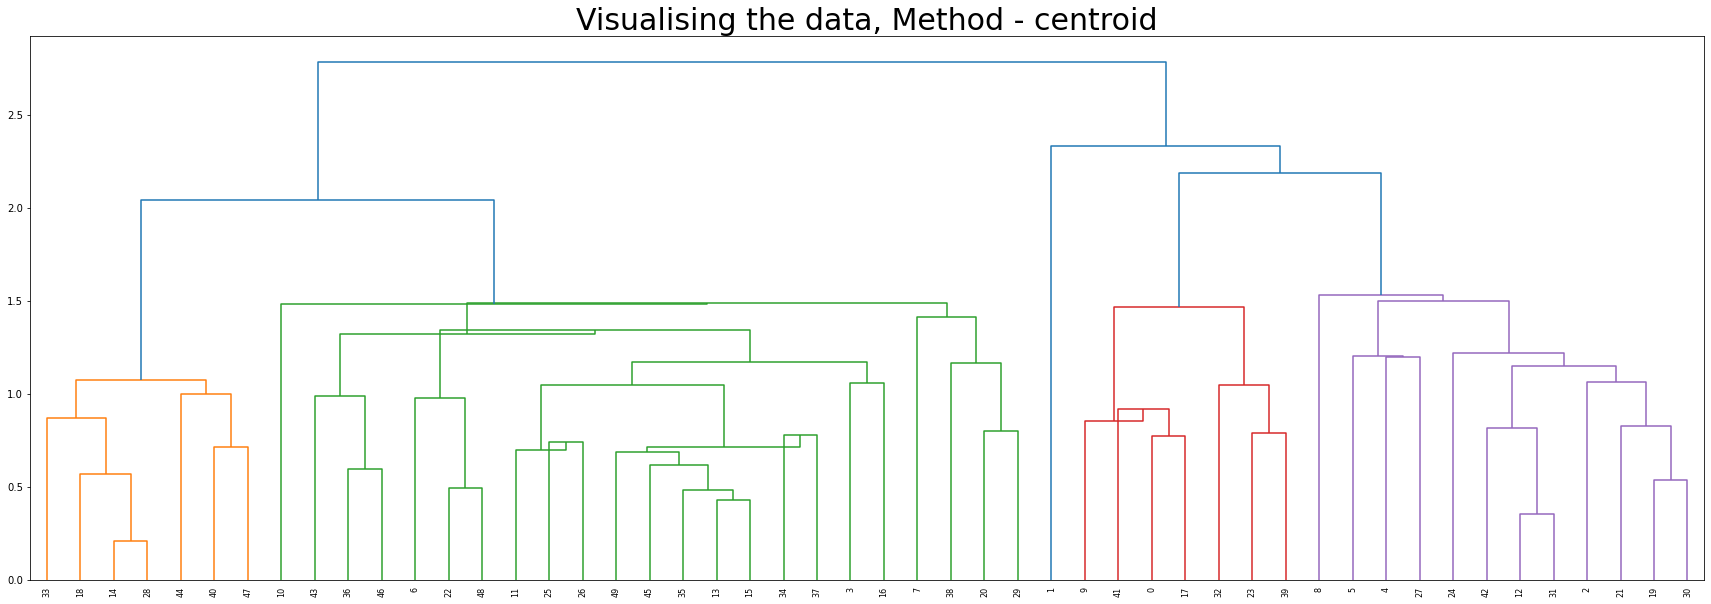

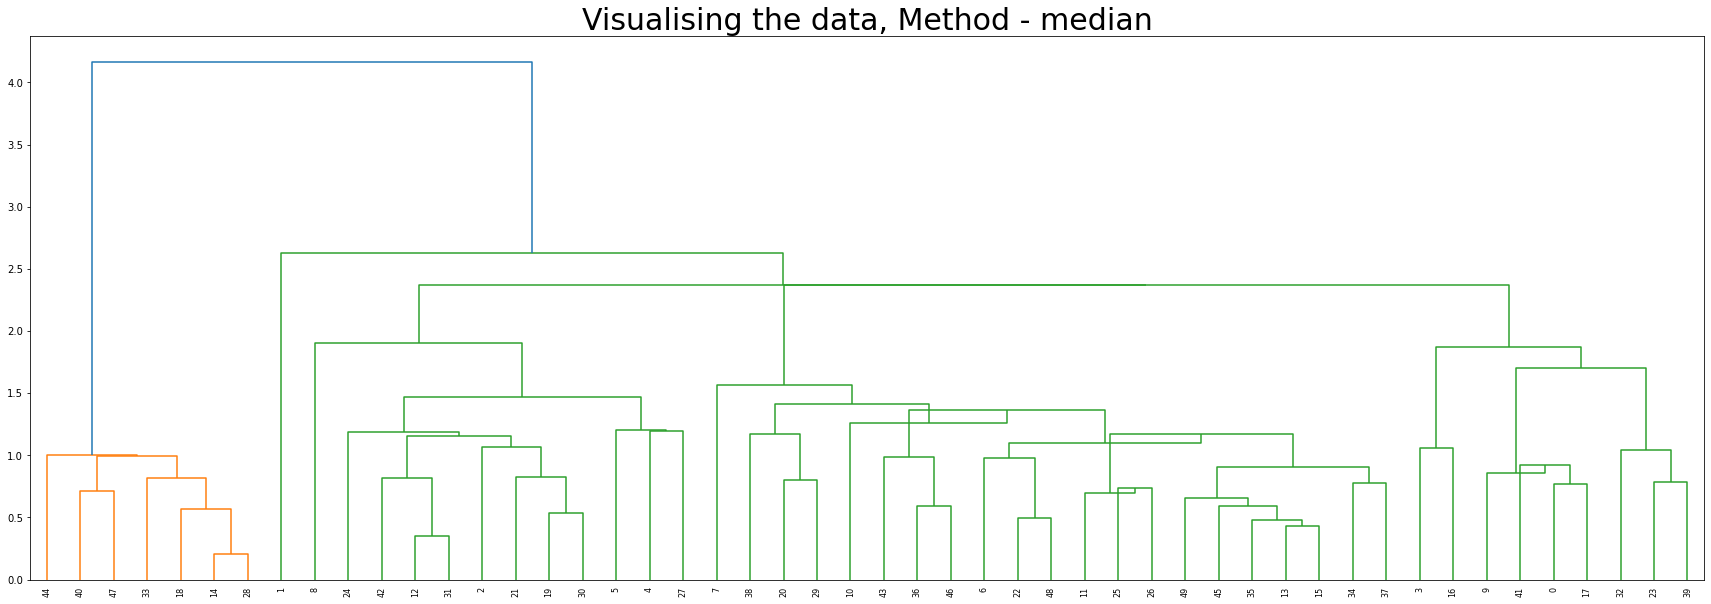

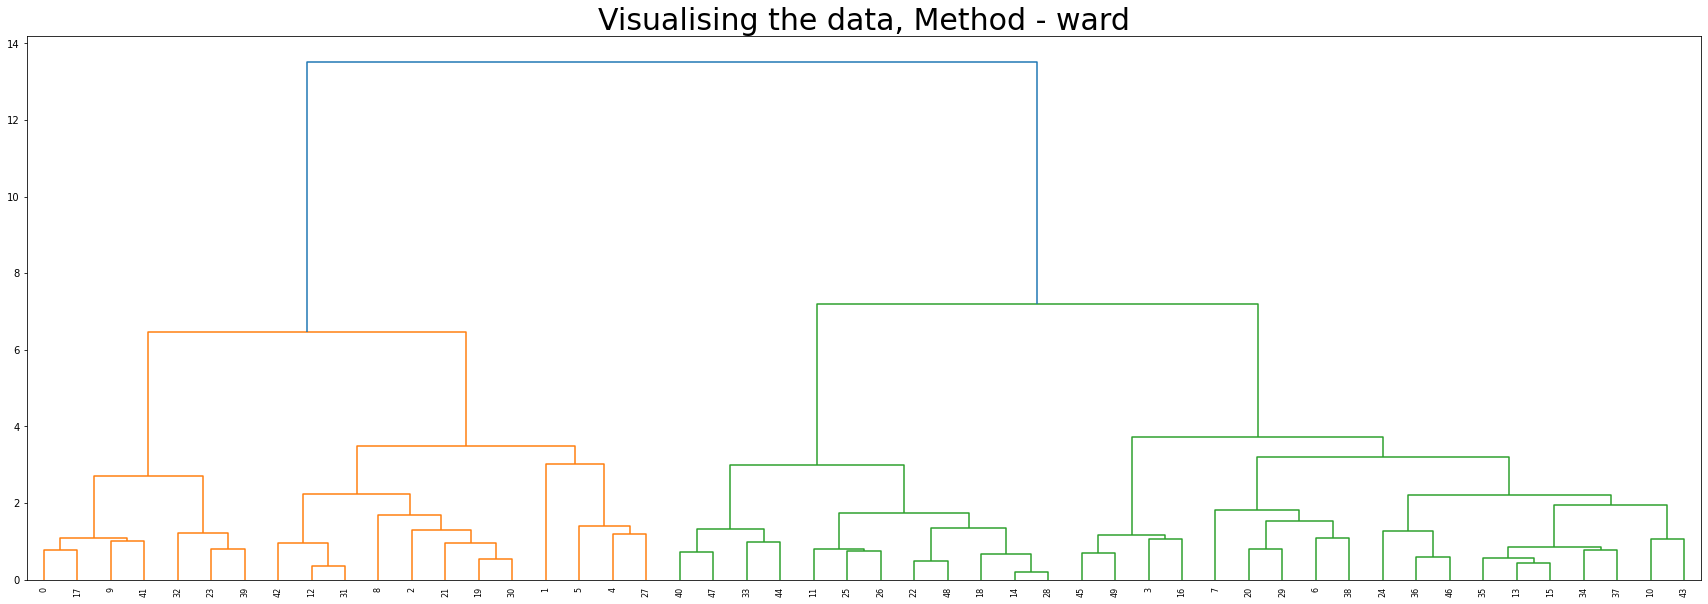

In [30]:
#Create Dendrogram
for method in ['single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward']:
    plt.figure(figsize = (30, 10))
    
    dict = {'fontsize' : 30, 'fontweight' : 12, 'color' : 'black'}
    
    plt.title('Visualising the data, Method - {}'.format(method), fontdict = dict)
    dendrogram = sch.dendrogram(sch.linkage(x, method = method, optimal_ordering = False))

In [31]:
#Create Clusters
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'complete')
hc

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [32]:
#Save clusters for chart
y_hc = hc.fit_predict(x)
y_hc

array([0, 0, 2, 1, 2, 2, 1, 1, 2, 0, 1, 3, 2, 1, 3, 1, 1, 0, 3, 2, 1, 2,
       1, 0, 1, 3, 3, 2, 3, 1, 2, 2, 0, 3, 1, 1, 1, 1, 1, 0, 3, 0, 2, 1,
       3, 1, 1, 3, 1, 1], dtype=int64)

In [33]:
Clusters = pd.DataFrame(y_hc, columns = ['Clusters'])
Clusters

,Clusters
0,0
1,0
2,2
3,1
4,2
5,2
6,1
7,1
8,2
9,0


In [34]:
Clusters.value_counts()

Clusters
1           21
2           11
3           10
0            8
dtype: int64

In [35]:
y_hc

array([0, 0, 2, 1, 2, 2, 1, 1, 2, 0, 1, 3, 2, 1, 3, 1, 1, 0, 3, 2, 1, 2,
       1, 0, 1, 3, 3, 2, 3, 1, 2, 2, 0, 3, 1, 1, 1, 1, 1, 0, 3, 0, 2, 1,
       3, 1, 1, 3, 1, 1], dtype=int64)

In [36]:
crime['clusterid_h'] = y_hc
crime

,state,Murder,Assault,UrbanPop,Rape,clusterid_k,clusterid_h
0,Alabama,13.2,236,58,21.2,Cluster 1,0
1,Alaska,10.0,263,48,44.5,Cluster 5,0
2,Arizona,8.1,294,80,31.0,Cluster 5,2
3,Arkansas,8.8,190,50,19.5,Cluster 4,1
4,California,9.0,276,91,40.6,Cluster 5,2
5,Colorado,7.9,204,78,38.7,Cluster 5,2
6,Connecticut,3.3,110,77,11.1,Cluster 3,1
7,Delaware,5.9,238,72,15.8,Cluster 4,1
8,Florida,15.4,335,80,31.9,Cluster 5,2
9,Georgia,17.4,211,60,25.8,Cluster 1,0


In [37]:
crime['clusterid_h'] = crime['clusterid_h'].replace(0, 'Cluster 1')
crime['clusterid_h'] = crime['clusterid_h'].replace(1, 'Cluster 2')
crime['clusterid_h'] = crime['clusterid_h'].replace(2, 'Cluster 3')
crime['clusterid_h'] = crime['clusterid_h'].replace(3, 'Cluster 4')
crime

,state,Murder,Assault,UrbanPop,Rape,clusterid_k,clusterid_h
0,Alabama,13.2,236,58,21.2,Cluster 1,Cluster 1
1,Alaska,10.0,263,48,44.5,Cluster 5,Cluster 1
2,Arizona,8.1,294,80,31.0,Cluster 5,Cluster 3
3,Arkansas,8.8,190,50,19.5,Cluster 4,Cluster 2
4,California,9.0,276,91,40.6,Cluster 5,Cluster 3
5,Colorado,7.9,204,78,38.7,Cluster 5,Cluster 3
6,Connecticut,3.3,110,77,11.1,Cluster 3,Cluster 2
7,Delaware,5.9,238,72,15.8,Cluster 4,Cluster 2
8,Florida,15.4,335,80,31.9,Cluster 5,Cluster 3
9,Georgia,17.4,211,60,25.8,Cluster 1,Cluster 1


In [38]:
crime.groupby('clusterid_h').mean()

,Murder,Assault,UrbanPop,Rape
clusterid_h,,,,
Cluster 1,14.087500,252.750000,53.500000,24.537500
Cluster 2,5.871429,134.476190,70.761905,18.580952
Cluster 3,11.054545,264.090909,79.090909,32.618182
Cluster 4,3.180000,78.700000,49.300000,11.630000


In [39]:
crime['clusterid_h'].value_counts()

Cluster 2    21
Cluster 3    11
Cluster 4    10
Cluster 1     8
Name: clusterid_h, dtype: int64

In [40]:
#Silhouette Score
X = metrics.silhouette_score(x, y_hc)
X

0.31595507426164543

##### DBSCAN

In [41]:
data = crime[['Murder', 'Assault', 'UrbanPop', 'Rape']]
data

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [42]:
array = data.values
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [43]:
stacaler = StandardScaler().fit(array)
x = stacaler.transform(array)

In [44]:
stscaler = StandardScaler()
X = stacaler.fit_transform(array)
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [45]:
dbscan = DBSCAN(eps = 1.2, min_samples = 8)
dbscan.fit(X)

DBSCAN(eps=1.2, min_samples=8)

In [46]:
#Noisy samples are given the label -1
dbscan.labels_

array([-1, -1, -1,  0, -1, -1,  0,  0, -1, -1,  0,  0, -1,  0,  0,  0,  0,
       -1,  0, -1,  0, -1,  0, -1,  0,  0,  0, -1,  0,  0, -1, -1, -1,  0,
        0,  0,  0,  0, -1, -1,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [47]:
data['cluster'] = pd.DataFrame(dbscan.labels_)
data

,Murder,Assault,UrbanPop,Rape,cluster
0,13.2,236,58,21.2,-1
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,-1


In [48]:
data['cluster'].value_counts()

 0    30
-1    20
Name: cluster, dtype: int64

In [49]:
#To find the percentage of noise points
(len(data[data['cluster'] == -1])/len(data))*100

40.0

In [50]:
#DBScan
X = metrics.silhouette_score(X, dbscan.labels_)
X

0.3785664955470221

In [51]:
def dbscan(X, eps, min_samples):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    db = DBSCAN(eps = eps, min_samples = min_samples)
    db.fit(X)
    y_pred = db.fit_predict(X)
    plt.scatter(X[:, 0], X[:, 1], c = y_pred, cmap = 'Paired')
    plt.title('DBSCAN')

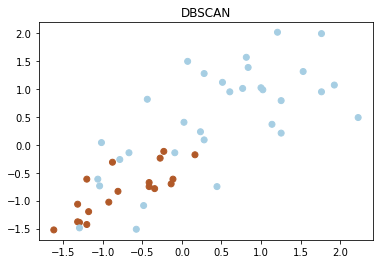

In [52]:
dbscan(array, 1.0, 8)

##### Conclusion:

- Two clusters are good to classify the crime rate states.
- From different clustering methods, it is evident that the DBSCAN has the highest silhouette score.
- Higher the silhouette score, more far are the clusters seperated from each other.